<h1> <center> Concrete Compressive Strength Prediction </center></h1>

## **Introduction**

Concrete is the most widely used construction material in civil engineering, and its compressive strength is a indicator of structural strength and durability. Predicting the compressive strength of concrete accurately can help optimize material usage, improve cost-efficiency, and ensure structural safety. The relationship between the concrete’s strength and its constituent materials is highly nonlinear, making it a nonlinear regression problem.

In this project, we use the Concrete Compressive Strength dataset from the UCI Machine Learning Repository, which contains 1,030 observations of concrete mixtures. 
Each record includes eight input variables representing the quantities (in kg/m³) of the concrete ingredients and the curing age (in days), along with the measured compressive strength (in MPa) as the response variable.

### **Dataset Description**
<div align="left">

| **Variable** | **Type** | **Unit** | **Description** |
|:--------------|:----------|:----------|:----------------|
| Cement | Quantitative | kg/m³ | Component 1 – Cement content |
| Blast Furnace Slag | Quantitative | kg/m³ | Component 2 – Slag content |
| Fly Ash | Quantitative | kg/m³ | Component 3 – Fly ash content |
| Water | Quantitative | kg/m³ | Component 4 – Water content |
| Superplasticizer | Quantitative | kg/m³ | Component 5 – Superplasticizer content |
| Coarse Aggregate | Quantitative | kg/m³ | Component 6 – Coarse aggregate content |
| Fine Aggregate | Quantitative | kg/m³ | Component 7 – Fine aggregate content |
| Age | Quantitative | days (1–365) | Age of the sample at testing |
| **Concrete Compressive Strength** | Quantitative | MPa | Measured compressive strength (Target) |

</div>

The dataset contains no missing values, and all predictors and the response are continuous.

### **Objective**
The goal of this project is to build predictive models for the compressive strength of concrete based on its composition and curing age. 

The workflow involves the following steps:

1. Fit and compare multiple regression models, including:
    - Polynomial Regression
    - Spline Regression
    - Regression Tree
    - Random Forest
    - Other candidate models

2. Split the dataset into 70% training and 30% testing subsets (with random_state = 598).
3. Evaluate model performance using Mean Squared Error (MSE) on the test data.
4. Apply cross-validation for hyperparameter tuning.
5. For tree-based models, analyze feature importance to interpret influential predictors.
6. Compare models based on prediction accuracy, interpretability, and model complexity.

### **Information about the data and Sample records**

In [1]:
import pandas as pd
concrete_mixtures_df = pd.read_excel("Concrete_Data.xls")
concrete_mixtures_df = concrete_mixtures_df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'cement_1',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag_2',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash_3',
    'Water  (component 4)(kg in a m^3 mixture)': 'water_4',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer_5',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate_6',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate_7', 
    'Age (day)':'age_in_days_8',
    'Concrete compressive strength(MPa, megapascals) ':'concrete_strength'
})
print("Details and sample records from the concrete mixture dataset:\n")
concrete_mixtures_df.info()
concrete_mixtures_df.head()

Details and sample records from the concrete mixture dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement_1              1030 non-null   float64
 1   blast_furnace_slag_2  1030 non-null   float64
 2   fly_ash_3             1030 non-null   float64
 3   water_4               1030 non-null   float64
 4   superplasticizer_5    1030 non-null   float64
 5   coarse_aggregate_6    1030 non-null   float64
 6   fine_aggregate_7      1030 non-null   float64
 7   age_in_days_8         1030 non-null   int64  
 8   concrete_strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement_1,blast_furnace_slag_2,fly_ash_3,water_4,superplasticizer_5,coarse_aggregate_6,fine_aggregate_7,age_in_days_8,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### **Exploratory data analysis**
### **Histogram and Box plot of response varaible** 

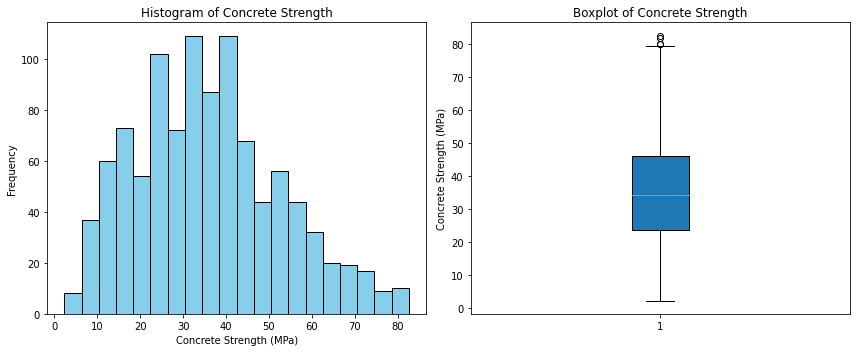

In [2]:
from matplotlib import pyplot as plt 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(concrete_mixtures_df['concrete_strength'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title("Histogram of Concrete Strength")
axes[0].set_xlabel("Concrete Strength (MPa)")
axes[0].set_ylabel("Frequency")

# Box plot
axes[1].boxplot(concrete_mixtures_df['concrete_strength'], vert=True, patch_artist=True)
axes[1].set_title("Boxplot of Concrete Strength")
axes[1].set_ylabel("Concrete Strength (MPa)")

plt.tight_layout()  
plt.show()

### **Histogram Interpretation**
- The histogram appears slightly right skewed
- That is most of the concrete compressive strength either have lower or moderate value(between 30MPa and 40MPa)
- Some of the concrete compressive strength are higher(ard 70MPa to 80MPa), which is stretching the right tail.
- The spread of the concrete compressive strength are continuous and wide indicating a substantial variation in compressive strength

### **Boxplot Interpretation**
- The median, the orange line is roughly in the middle of the boxplot indicating moderate skewness
- The interquartile range(IQR) that is the height of the box, shows where the middle 50% of data lie
- There are few outliers which have high concrete compressive strength

### **Testing for collinearity between predictors**
- To check the collinearity between the predictors we can use correlation matrix
- **Correlation Matrix**

In [3]:
correlation_matrix = concrete_mixtures_df.corr()
correlation_matrix

,cement_1,blast_furnace_slag_2,fly_ash_3,water_4,superplasticizer_5,coarse_aggregate_6,fine_aggregate_7,age_in_days_8,concrete_strength
cement_1,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blast_furnace_slag_2,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
fly_ash_3,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water_4,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer_5,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_aggregate_6,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_aggregate_7,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age_in_days_8,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
concrete_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


### **Interpretation of correlation matrix**
- From the correlation matrix we can see that almost all of the predictors have correlation score < 0.5 and hence are not correlated.
- Some of the predictors are slightly negatively correlated. ex: **superplasticizer and water have correlation = -0.657464**

### **Correlation of the predictors with concrete compressive strength**
- We can see that the cement component has a moderate positive correlation with the response variable (0.497833)
- Some of the predictors are slightly negatively correlated with the response variable like water (-0.289613), fly_ash, coarse_aggregate and fine_aggregate

### **Summary of correlation**
- Concrete strength increases mainly with cement, superplasticizer, and age.
- It decreases with water content, fly_ash, coarse_aggregate, and fine_aggregate.
- Few predictors have some degree of multicollinearity
    1. Water and Superplasticizer
    2. Cement and (fly_ash / blast_furnace_slag)

### **Pair Plot**

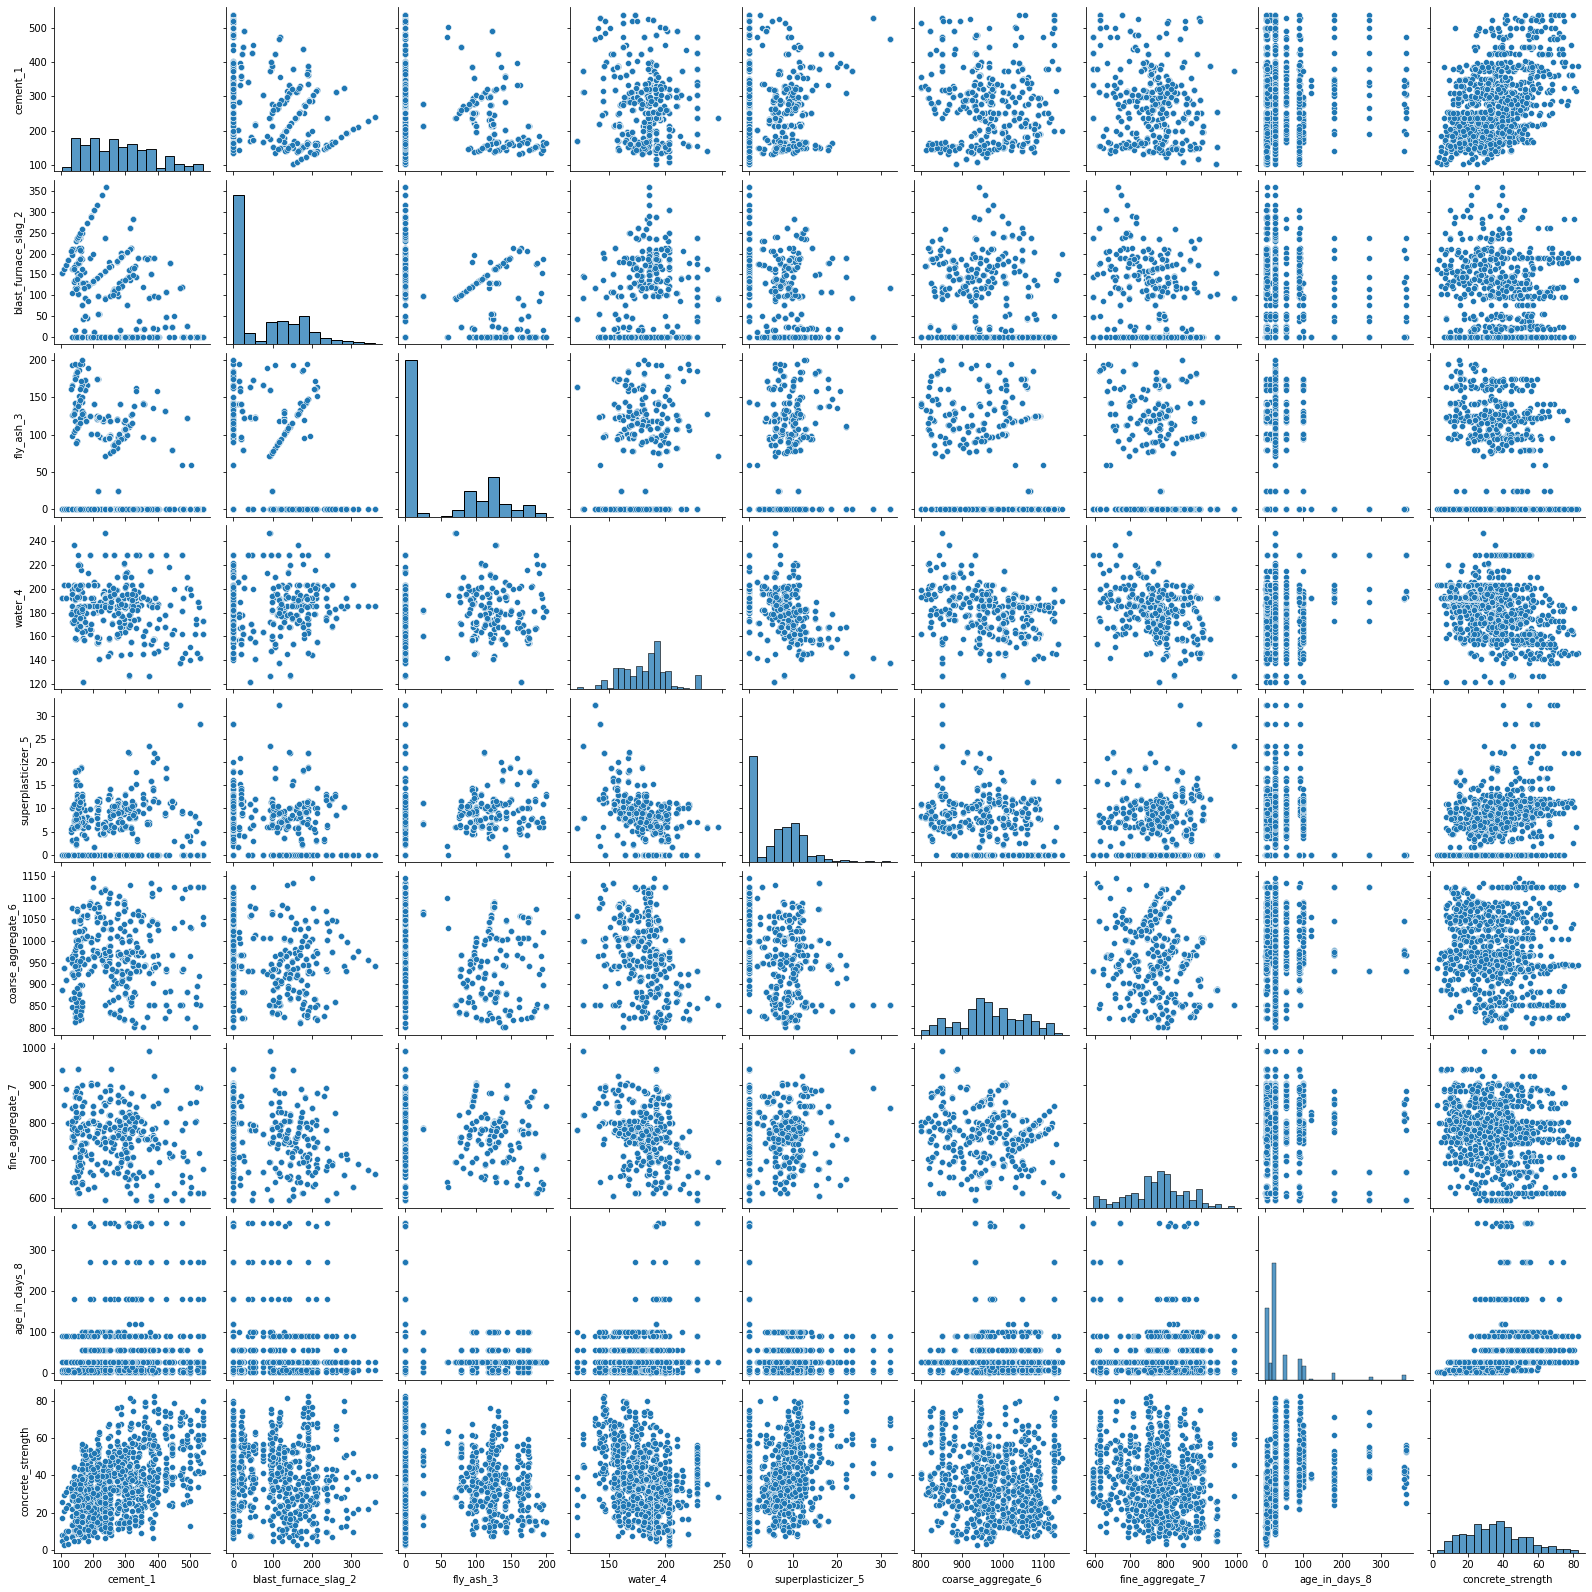

In [5]:
import seaborn as sns

sns.pairplot(concrete_mixtures_df)
plt.show()

- Same as correlation matrix, we can see that most of the predictors do not have a linear relationship with the response variable except Cement component
- The cement component has a moderate positive correlation with concrete_strength
- And the predictors "Water and Superplasticizer" have some degree of multicollinearity, as discussed above

### **Variance Inflation factor**

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
features = concrete_mixtures_df.columns.drop('concrete_strength')
X_const = sm.add_constant(concrete_mixtures_df[features])
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

vif_data

,Feature,VIF
0,const,6732.373793
1,cement_1,7.488657
2,blast_furnace_slag_2,7.276529
3,fly_ash_3,6.171455
4,water_4,7.004663
5,superplasticizer_5,2.965297
6,coarse_aggregate_6,5.076044
7,fine_aggregate_7,7.005346
8,age_in_days_8,1.118357


- Several predictors have VIF > 5, especially cement_1, blast_furnace_slag_2, fly_ash_3, water_4, and fine_aggregate_7.
- This suggests moderate to strong multicollinearity among the above mentioned predictors.

### **Splitting the data into train and test**
**70% of the available data is split as training data and 30% as test data with seed = 598 for reproducibility**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(concrete_mixtures_df[features], concrete_mixtures_df['concrete_strength'],train_size=0.7,random_state=598)
print("Shape of training data(features):",X_train.shape)
print("Shape of testing data(features):",X_test.shape)
print("Shape of training data(target):",Y_train.shape)
print("Shape of testing data(target):",Y_test.shape)
print("Sample training data:")
X_train.head()

Shape of training data(features): (721, 8)
Shape of testing data(features): (309, 8)
Shape of training data(target): (721,)
Shape of testing data(target): (309,)
Sample training data:


,cement_1,blast_furnace_slag_2,fly_ash_3,water_4,superplasticizer_5,coarse_aggregate_6,fine_aggregate_7,age_in_days_8
176,379.50,151.20,0.00,153.90,15.90,1134.3,605.00,91
736,238.00,0.00,0.00,186.00,0.00,1119.0,789.00,7
83,362.60,189.00,0.00,164.90,11.60,944.7,755.80,3
233,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,100
454,250.00,0.00,95.69,191.84,5.33,948.9,857.20,56


## Model Selection and prediction
### **FULL Linear Model**
### **Model Summary**

In [6]:
import statsmodels.api as sm 
X_train_const = sm.add_constant(X_train) 
X_test_const = sm.add_constant(X_test) 
OLS_full_model = sm.OLS(Y_train, X_train_const).fit() 
print(OLS_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:      concrete_strength   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     145.6
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          2.75e-144
Time:                        13:08:45   Log-Likelihood:                -2699.8
No. Observations:                 721   AIC:                             5418.
Df Residuals:                     712   BIC:                             5459.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.4667 

- Adj R^2 = 0.616. The linear model explains about 61% of the variability in concrete strength — a moderately good fit.
- F-statistic = 145.6, p < 2.75e-144, this indicates the model as a whole is highly significant, so at least one predictor is related to the response.
- Cement, blast furnace slag, fly ash, water, superplasticizer, and age are significant predictors (p < 0.05).
- Coarse and fine aggregate are not significant (p > 0.05).
- Overall, the model is able to capture only ~61% of the vriability in the response variable.

### **Fitted vs Residual plot**

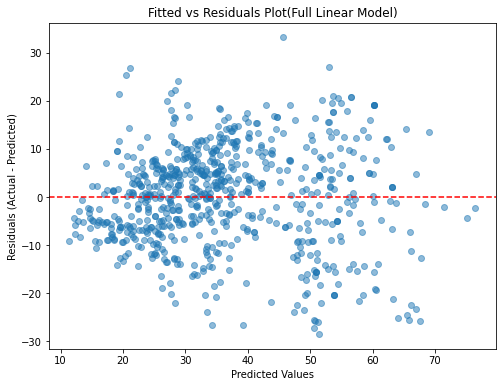

In [7]:
residuals = OLS_full_model.resid
plt.figure(figsize=(8,6))
plt.scatter(OLS_full_model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Fitted vs Residuals Plot(Full Linear Model)")
plt.show()

- The residuals appear to scatter randomly around 0, linearity asssumption is satisfied.
- There is no obvious pattern in errors
- But the errors have slightly increasing variance (heteroscedasticity) as fitted values increase, the spread around 0 widens.

- We can add non-linear term and check if Adj.R^2 improves

### **Ramsey RESET Test**
- The Ramsey RESET test checks whether the linear model is sufficient or if we are missing on non-linear or interaction terms
    - Null hypothesis (H0): The linear model is sufficient to explain the variance of the response variable.
    - Alternative hypothesis (H1): The model requires non linear or interaction terms

In [8]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(OLS_full_model, power=2, test_type='fitted')
print(reset_test)

<Wald test (chi2): statistic=30.29997672082409, p-value=3.7013034634091795e-08, df_denom=1>


- Very small p_value = 3.7013034634091795e-08(<0.05) indicates that NULL Hypothesis can be rejected
- That is linear model is not sufficient and it requires polynomial or interaction terms to explain the variance of the response variable 

### **Polynomial Regression(Degree =2)**
### **Model Summary**

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating polynomial features of degree = 2
# include_bias=True(default) - includes intercept
poly_deg2_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_deg2_features.fit_transform(X_train)
X_test_poly = poly_deg2_features.transform(X_test)

# Getting names for the generated features
feature_names = poly_deg2_features.get_feature_names_out(X_train.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names)

# To match the indicies of transformed X_train_poly
Y_train = Y_train.reset_index(drop=True)

poly_ols_model = sm.OLS(Y_train, X_train_poly_df).fit()
print(poly_ols_model.summary())

# Model prediction and Evaluation
y_train_pred_poly = poly_ols_model.predict(X_train_poly_df)
y_test_pred_poly = poly_ols_model.predict(X_test_poly_df)

print("\n")
print("Model Evaluation:")
print("Polynomial regression Train MSE:", mean_squared_error(Y_train, y_train_pred_poly))
print("Polynomial regression Test MSE:",mean_squared_error(Y_test, y_test_pred_poly))
print("\n")

print("Polynomial regression Train RMSE:", np.sqrt(mean_squared_error(Y_train, y_train_pred_poly)))
print("Polynomial regression Test RMSE:",np.sqrt(mean_squared_error(Y_test, y_test_pred_poly)))
print("\n")

print("Polynomial regression R^2 on train:", r2_score(Y_train,y_train_pred_poly))
print("Polynomial regression R^2 on test :", r2_score(Y_test,y_test_pred_poly))
print("\n")


                            OLS Regression Results                            
Dep. Variable:      concrete_strength   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     70.09
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          1.00e-220
Time:                        13:08:58   Log-Likelihood:                -2430.5
No. Observations:                 721   AIC:                             4951.
Df Residuals:                     676   BIC:                             5157.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### **Interpretation of the Polynomial Regression results**
- The train R^2 ~0.82, that is the model explains ~82% of the variation in Train data and ~77% of the variation in Test data.
- The model moderately generalizes well.(Train MSE ~49.6 and TEST MSE ~63.13)
- F-statistic = 70.09 and p-value is very small (1.00e-220), indicating the model is significant, and atleast one beta coefficient is not equal to zero.
- Though the model has got a better R^2 when compared to the linear model, the model complexity is very high with 44 parameters
- And the condition number is large, 7.81e+09 which indicates high multicollinearity
- To reduce the model complexity and to resolve multicollinearity, we can try polynomial ridge regression model

### **Polynomial Feature Standardization**

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardizing the Training and Test data with degree 2 features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Getting names for the generated features
feature_names = poly_deg2_features.get_feature_names_out(X_train.columns)
X_train_poly_std_df = pd.DataFrame(X_train_poly_scaled, columns=feature_names)
X_test_poly_std_df = pd.DataFrame(X_test_poly_scaled, columns=feature_names)

X_train_poly_std_df.head()

,1,cement_1,blast_furnace_slag_2,fly_ash_3,water_4,superplasticizer_5,coarse_aggregate_6,fine_aggregate_7,age_in_days_8,cement_1^2,...,superplasticizer_5^2,superplasticizer_5 coarse_aggregate_6,superplasticizer_5 fine_aggregate_7,superplasticizer_5 age_in_days_8,coarse_aggregate_6^2,coarse_aggregate_6 fine_aggregate_7,coarse_aggregate_6 age_in_days_8,fine_aggregate_7^2,fine_aggregate_7 age_in_days_8,age_in_days_8^2
0,0.0,0.911123,0.903200,-0.838329,-1.264101,1.562592,2.051352,-2.060177,0.689522,0.791055,...,1.340303,2.119913,0.906804,3.847139,2.181092,-0.730911,0.922003,-1.907312,0.427355,0.090872
1,0.0,-0.429040,-0.850950,-0.838329,0.215309,-1.022405,1.858670,0.165808,-0.603164,-0.522667,...,-0.591201,-1.049359,-0.980183,-0.651806,1.957759,1.462580,-0.585771,0.115178,-0.623215,-0.297815
2,0.0,0.751061,1.341738,-0.838329,-0.757138,0.863505,-0.336393,-0.235837,-0.664720,0.602491,...,0.436856,0.876331,0.739630,-0.543600,-0.372404,-0.421333,-0.664787,-0.289227,-0.692266,-0.299704
3,0.0,-0.658999,0.286579,-0.452425,0.017593,0.092883,1.188691,0.122014,0.828024,-0.687570,...,-0.231659,0.235437,0.076684,1.481221,1.204810,0.951318,0.975093,0.070239,0.925427,0.172037
4,0.0,-0.315387,-0.850950,0.668284,0.484460,-0.155862,-0.283500,0.990874,0.150903,-0.434621,...,-0.374153,-0.160604,-0.083940,0.276278,-0.320884,0.687383,0.130358,1.000441,0.277787,-0.152058


### **Polynomial Ridge Regression**

In [10]:
from sklearn.linear_model import RidgeCV

# Fitting the Ridge model with regularization alpha in logspace
alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train_poly_std_df, Y_train)

print("Best lambda (Ridge):", ridge.alpha_)
print("Minmum and Maximum Lambda:",alphas.min(),alphas.max())
print("\n")

# Ridge Train and TEST MSE
mprice_train_preds_ridge = ridge.predict(X_train_poly_std_df)
mprice_test_preds_ridge = ridge.predict(X_test_poly_std_df)

print("Model Evaluation:")
print("Ridge Train MSE:", mean_squared_error(Y_train, mprice_train_preds_ridge))
print("Ridge Test MSE:",mean_squared_error(Y_test, mprice_test_preds_ridge))
print("\n")

# Ridge RMSE 
print("Ridge Train RMSE:", np.sqrt(mean_squared_error(Y_train, mprice_train_preds_ridge)))
print("Ridge Test RMSE:",np.sqrt(mean_squared_error(Y_test, mprice_test_preds_ridge)))
print("\n")

print("Ridge R^2 on train:", ridge.score(X_train_poly_std_df, Y_train))
print("Ridge R^2 on test :", ridge.score(X_test_poly_std_df, Y_test))
print("\n")

# Ridge coefficients
ridge_predictors_coef_df = pd.DataFrame({
            "Predictors":X_train_poly_std_df.columns,
            "Coefficients": ridge.coef_
            })
print("Ridge Predictors and Coefficients:")
ridge_predictors_coef_df

Best lambda (Ridge): 0.001
Minmum and Maximum Lambda: 0.001 1000.0


Model Evaluation:
Ridge Train MSE: 49.790271426160736
Ridge Test MSE: 63.19918801947087


Ridge Train RMSE: 7.0562221780610574
Ridge Test RMSE: 7.94979169660884


Ridge R^2 on train: 0.8195670855121739
Ridge R^2 on test : 0.7784509136771309


Ridge Predictors and Coefficients:


,Predictors,Coefficients
0,1,0.000000
1,cement_1,176.804857
2,blast_furnace_slag_2,84.604784
3,fly_ash_3,8.358780
4,water_4,222.084990
5,superplasticizer_5,151.770477
6,coarse_aggregate_6,92.861230
7,fine_aggregate_7,187.603111
8,age_in_days_8,4.318149
9,cement_1^2,-17.519062


- In the above ridge regression, I see that RidgeCV always picks the smallest alpha in the logspace. 
- That is if the logspace is
    - alphas = np.logspace(-1, 1, 100) - best alpha was 0.1 (Minmum and Maximum Lambda: 0.1 10.0)
    - alphas = np.logspace(-2, 2, 100) - best alpha was 0.01 (Minmum and Maximum Lambda: 0.01 100.0)
    - alphas = np.logspace(-3, 3, 100) - best alpha was 0.001 (Minmum and Maximum Lambda: 0.001 1000.0)

- **It means that the model doesn't require regularization, i.e., Ridge is behaving like OLS because the data doesn’t benefit from penalizing coefficients for its complexity.**
- **And the R^2 of the ridge polynomial regression is close to the R^2 of the normal polynomial regression with degree 2. That is both the models can explain ~80% of the variation in concrete compressive strength**
- **Although VIF analysis indicated moderate multicollinearity among a few predictors, the RidgeCV results suggest that multicollinearity does not affect model performance.**

### **Orthogonal Polynomial regression**
- Apart from Ridge regression this is another way to solve multicollinearity that occurs in polynomial regression,which is using orthogonal polynomial regression.

### **Model Summary**

In [12]:
from numpy.polynomial.legendre import legvander
deg = 2
X_train_leg_all = []
X_test_leg_all = []

for col in X_train_poly_std_df.columns:
    leg_features = legvander(X_train_poly_std_df[col].values, deg)
    leg_df = pd.DataFrame(leg_features, columns=[f"{col}_Legendre_{i}" for i in range(deg+1)])
    X_train_leg_all.append(leg_df)   

# Contactinating the list as columns
X_train_leg_all_df = pd.concat(X_train_leg_all, axis=1)
X_train_leg_all_df = sm.add_constant(X_train_leg_all_df) 

for col in X_test_poly_std_df.columns:
    leg_features = legvander(X_test_poly_std_df[col].values, deg)
    leg_df = pd.DataFrame(leg_features, columns=[f"{col}_Legendre_{i}" for i in range(deg+1)])
    X_test_leg_all.append(leg_df)   

X_test_leg_all_df = pd.concat(X_test_leg_all, axis=1)
X_test_leg_all_df = sm.add_constant(X_test_leg_all_df)

ols_ortho_poly_model = sm.OLS(Y_train, X_train_leg_all_df).fit()
print(ols_ortho_poly_model.summary())


# Model prediction and Evaluation
y_train_pred_ortho_poly = ols_ortho_poly_model.predict(X_train_leg_all_df)
y_test_pred_ortho_poly = ols_ortho_poly_model.predict(X_test_leg_all_df)

print("\n")
print("Model Evaluation:")
print("Orthogonal Polynomial regression Train MSE:", mean_squared_error(Y_train, y_train_pred_ortho_poly))
print("Orthogonal Polynomial regression Test MSE:",mean_squared_error(Y_test, y_test_pred_ortho_poly))
print("\n")

print("Orthogonal Polynomial regression Train RMSE:", np.sqrt(mean_squared_error(Y_train, y_train_pred_ortho_poly)))
print("Orthogonal Polynomial regression Test RMSE:",np.sqrt(mean_squared_error(Y_test, y_test_pred_ortho_poly)))
print("\n")

print("Orthogonal Polynomial regression R^2 on train:", r2_score(Y_train,y_train_pred_ortho_poly))
print("Orthogonal Polynomial regression R^2 on test :", r2_score(Y_test,y_test_pred_ortho_poly))





                            OLS Regression Results                            
Dep. Variable:      concrete_strength   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     64.86
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          2.71e-257
Time:                        13:09:22   Log-Likelihood:                -2252.8
No. Observations:                 721   AIC:                             4668.
Df Residuals:                     640   BIC:                             5039.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### **Observations from the Orthogonal polynomial results**
- The model is explaining  ~89% of the variability of concrete_strength on train data and ~82% of the variability in test data. 
- This is a strong fit, indicating that the combination of features (linear, quadratic, interaction, and Legendre terms) successfully captures the trend in the training data.
- The condition number is very high 5.62e+16. This indicate that there are strong multicollinearity in the design matrix
- And the model is very complex and not interpretable

### **SPLINES - Piecewise polynomial regression**
- Splines allow model to be **locally flexible** without overfitting globally
- Splines are piecewise polynomial joined at specific points called knots
- Since concrete strength is nonlinear with its features, data modeling with splines may help
- Instead of manually choosing degree of spline and the number of knots and applying a ridge penalty, we can use PyGAM
- pyGAM (Generalized Additive Models) automatically
    - Fits smooth spline functions for each predictor.(By default, **pyGAM uses cubic splines degree=3**)
    - Tunes the smoothing penalty lambda automatically using cross-validation.
- That is **pyGAM** can be used for **Splinetransformer + RidgeCV** (which automatically chooses the number of knots and penalty)
- Since GAM uses penalty term to control the overall smoothness of the function, **the predictors has to be standardized**, so that penalty is applied across all predictors evenly.

In [13]:
from pygam import LinearGAM, s
from sklearn.metrics import r2_score

# Standardizing the Training and Test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Specifying one smooth term s() per predictor - spline term
# Initially each smooth term s() will start with 20 n_splines/20 basis functions for each predictor and with polynomial deg = 3 by default
# Here n_splines are very close to knots, but not knots. n_knots = n_splines - degree + 1
# n_splines = number of basis functions per predictor
# These basis functions overlap smoothly and sum to one smooth curve per predictor
# The model estimates 20 beta coefficients for one predictor initially and
# The smoothing penalty lambda controls how wiggly that final combination can be
# sum of several cubic basis splines are smoothly connected at multiple knots
# The n_spline are gradually increased(like 30/40) if the model underfits.
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7))

# gam.gridsearch() is used to tune both n_splines and lamda for each term
gam.gridsearch(X_train_scaled_df.values, Y_train.values)


# Evaluting Train and Test data
Y_train_gam_pred = gam.predict(X_train_scaled_df)
Y_test_gam_pred = gam.predict(X_test_scaled_df)

print("Model Evaluation:")
print("Spline GAM Train MSE:", mean_squared_error(Y_train, Y_train_gam_pred))
print("Spline GAM Test MSE:",mean_squared_error(Y_test, Y_test_gam_pred))
print("\n")

print("Spline GAM Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_gam_pred)))
print("Spline GAM Test RMSE:",np.sqrt(mean_squared_error(Y_test, Y_test_gam_pred)))
print("\n")

print("Spline GAM R^2 on train:", r2_score(Y_train,Y_train_gam_pred))
print("Spline GAM R^2 on test :", r2_score(Y_test,Y_test_gam_pred))



  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


Model Evaluation:
Spline GAM Train MSE: 21.561392496281627
Spline GAM Test MSE: 32.25018695590052


Spline GAM Train RMSE: 4.643424651728681
Spline GAM Test RMSE: 5.6789248063256235


Spline GAM R^2 on train: 0.921864557531294
Spline GAM R^2 on test : 0.8869447586633521


### **Observations from spline polynomial regression(with Ridge) using pyGAM**
- The R² values (0.92 on train, 0.89 on test) indicate that GAM explains ~89% of the variance in the test data which is a strong predictive performance.
- Though there is a slight increase in test MSE and RMSE when compared to train MSE and RMSE, the model generalization is still strong.
- **Hence we can see that the GAM model was able to capture the non-linear relationship between the predictors and the response variable with local flexibility using splines.**

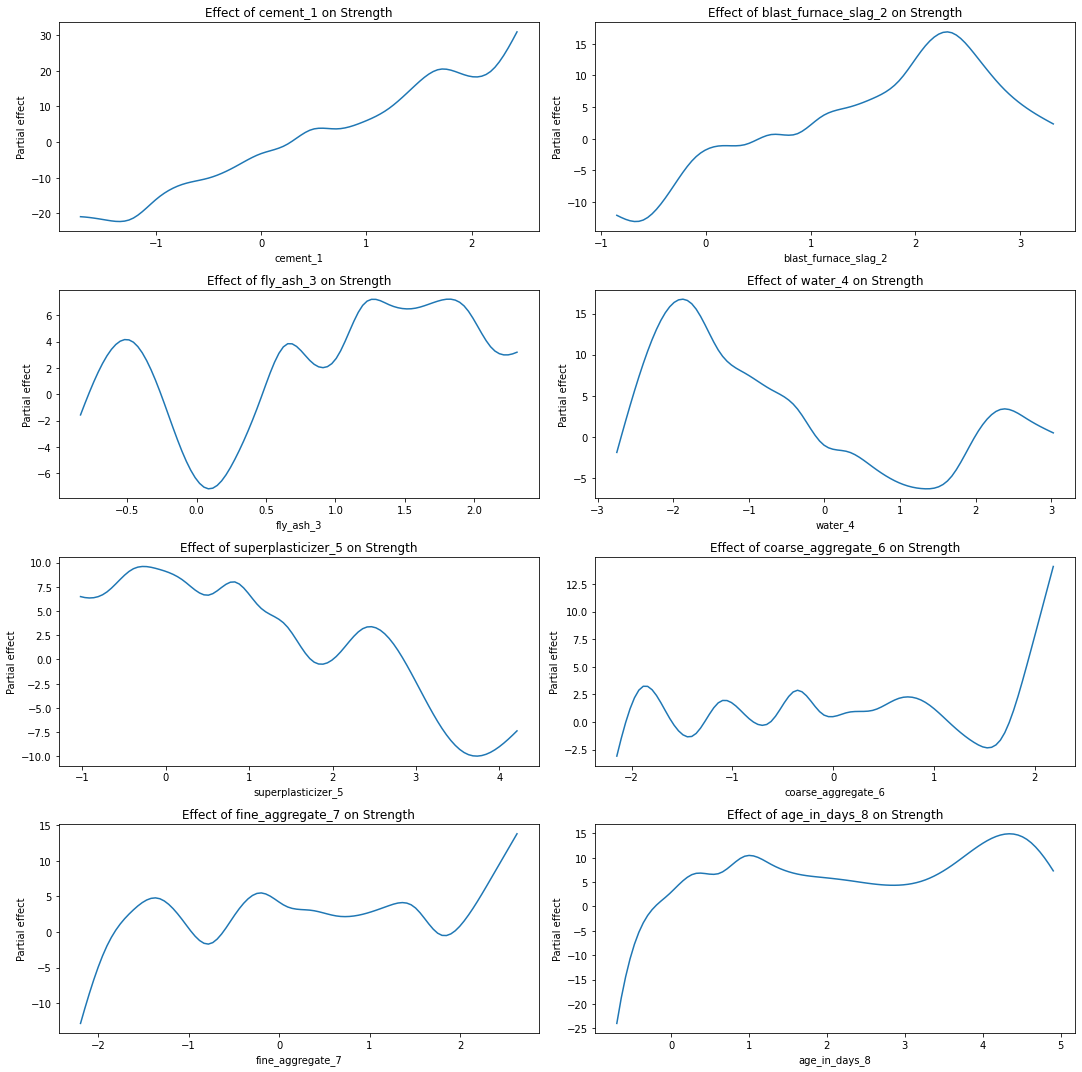

In [14]:
n_features = len(X_train_scaled_df.columns)
cols_per_row = 2
rows = int(np.ceil(n_features / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 15))
axes = axes.flatten() 

for i, col in enumerate(X_train_scaled_df.columns):
    XX = gam.generate_X_grid(term=i)
    axes[i].plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    axes[i].set_title(f"Effect of {col} on Strength")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Partial effect")

plt.tight_layout()
plt.show()

### **About the partial dependence plot**
- Each plot corresponds to one predictor variable
- The x-axis represents the predictor’s standardized value
- The y-axis represents the partial effect of each predictor on the predicted response, with all the other variables constant

### **Observations from the partial dependence plot**
- As Cement content increases, the concrete compression strength rises 
- Small content of Superplasticizer implies moderate concrete compression strength, but increasing the Superplasticizer beyond a level decreases the concrete compression strength 
- As the number of days increases the concrete compression strength increases and the graph flatten as the days increases further
- For smaller values of water the concrete compression strength is good, but as the water level increases the concrete compression strength decreases 
 

### **Tree based Models**
### **Prediction using DecisionTreeRegressor (max_depth=6)**

In [16]:
from sklearn.tree import DecisionTreeRegressor
full_tree_model = DecisionTreeRegressor(max_depth=6,random_state=598)
full_tree_model.fit(X_train,Y_train)

Y_train_tree_pred = full_tree_model.predict(X_train)
Y_test_tree_pred = full_tree_model.predict(X_test)

print("Model Evaluation:")
print("Single Tree Train MSE:", mean_squared_error(Y_train, Y_train_tree_pred))
print("Single Tree Test MSE:",mean_squared_error(Y_test, Y_test_tree_pred))
print("\n")

print("Single Tree Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_tree_pred)))
print("Single Tree Test RMSE:",np.sqrt(mean_squared_error(Y_test, Y_test_tree_pred)))
print("\n")

print("Single Tree R^2 on train:", r2_score(Y_train,Y_train_tree_pred))
print("Single Tree R^2 on test :", r2_score(Y_test,Y_test_tree_pred))



Model Evaluation:
Single Tree Train MSE: 31.54487289511842
Single Tree Test MSE: 69.99670815569486


Single Tree Train RMSE: 5.6164822527199725
Single Tree Test RMSE: 8.366403537703334


Single Tree R^2 on train: 0.8856858339875668
Single Tree R^2 on test : 0.754621740824819


### **Feature Importance for DecisionTreeRegressor model**

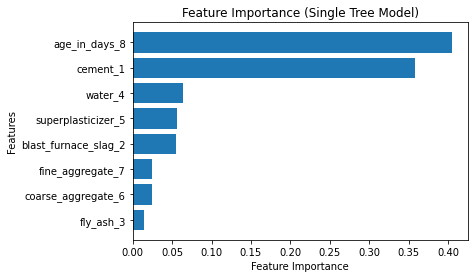

In [17]:
sorted_indicies = np.argsort(full_tree_model.feature_importances_)
plt.barh(X_train.columns[sorted_indicies],full_tree_model.feature_importances_[sorted_indicies])
plt.title("Feature Importance (Single Tree Model)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

### **Observations from the results of Single Regression Tree**
- The tree fits the training data well with R^2 ~0.89, for max_depth=6
- The test R^2 is ~0.77 which is less then the train R^2, but still the model generalizes reasonably well with slight overfitting.
- The prediction results can improve with different values of max_depth or min_samples_leaf
- From the feature importance plot, we can see that the top 3 predictors are "age_in_days" , "cement" and "water"

### **Prediction using RandomForestRegressor(Hyperparameters tuned using GridSearchCV)**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=598)
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [4, 5, 6, 7],        
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [3,4,5],         
    'max_features': [4,5,6]  
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  
    cv=5
)

grid_search.fit(X_train, Y_train)

# Extracting best model
best_rf = grid_search.best_estimator_

# Prediction
Y_train_rf_pred = best_rf.predict(X_train)
Y_test_rf_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)


# Evaluation
print("Model Evaluation:")
print("Random Forest Train MSE:", mean_squared_error(Y_train, Y_train_rf_pred))
print("Random Forest Test MSE:",mean_squared_error(Y_test, Y_test_rf_pred))
print("\n")

print("Random Forest Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_rf_pred)))
print("Random Forest Test RMSE:",np.sqrt(mean_squared_error(Y_test, Y_test_rf_pred)))
print("\n")

print("Random Forest R^2 on train:", r2_score(Y_train,Y_train_rf_pred))
print("Random Forest R^2 on test :", r2_score(Y_test,Y_test_rf_pred))


Best Parameters: {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Model Evaluation:
Random Forest Train MSE: 17.337294874157617
Random Forest Test MSE: 40.76697563964452


Random Forest Train RMSE: 4.1638077374150715
Random Forest Test RMSE: 6.384902163670523


Random Forest R^2 on train: 0.9371720909752768
Random Forest R^2 on test : 0.8570885720505255


### **Feature Importance for RandomForestRegressor model**

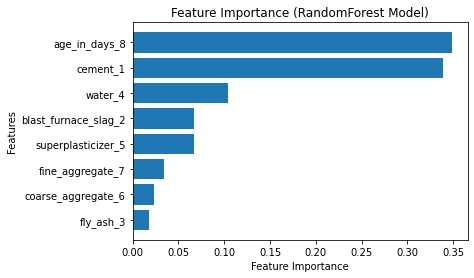

In [83]:
sorted_indicies = np.argsort(best_rf.feature_importances_)
plt.barh(X_train.columns[sorted_indicies],best_rf.feature_importances_[sorted_indicies])
plt.title("Feature Importance (RandomForest Model)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

### **Observations from the Prediction result of RandomForestRegressor (using GridSearchCV)**
- The tuned Random Forest model (with n_estimators = 200, max_depth = 7, max_features = 6, min_samples_split = 2, and min_samples_leaf = 1) shows strong predictive performance.
- The model explains 94.8%(Train R^2=0.9475) of the variance in the training data and 86.7%(Test R^2=0.8667) of the variance in the test data. 
- The model fits the training data very well(Train MSE=14.4) and generalizes reasonably well to unseen data, with only a moderate increase in Test MSE(38.0233).
- Though the prediction results are better than Single Tree model, in random forest, the interpretability of the model is less compared to Single tree model. This is because, each tree has its own structure (different splits and thresholds) and the final prediction is an average of all trees.
- From the feature importance plot, we can see that the top 3 predictors are "age_in_days", "cement" and "water"

### **Model Comparison for Concrete Compressive Strength Prediction**

| **Model**                                        | **Train MSE** | **Test MSE** | **Train R²** | **Test R²** | **Observations**                                                                                             |
| ------------------------------------------------ | ------------- | ------------ | ------------ | ----------- | --------------------------------------------------------------------------------------------------------- |
| **Polynomial Regression (Degree = 2)**           | 49.61         | 63.14        | 0.820        | 0.779       | Explains ~78% variance on test data. Has high multicollinearity and overfitting due to 44 predictors. |
| **Polynomial Ridge Regression**                  | 49.79         | 63.20        | 0.820        | 0.778       | Regularization didn’t improve results — in different range of logspace, always smallest alpha was chosen, indicating Ridge behaves like OLS.                   |
| **Orthogonal Polynomial Regression**             | 30.30         | 48.55        | 0.890        | 0.830       | Better generalization than regular polynomial; was still complex to interpret and had multicollinearity.                          |
| **Spline Regression (PyGAM)**                    | 21.56         | 32.25        | **0.922**        | **0.887**       | Strong nonlinear predictive performance, captures local trends; best smooth generalization among regression models.          |
| **Single Regression Tree (max_depth = 6)**       | 31.54         | 72.08        | 0.886        | 0.747       | Slight overfitting; less predictive performance when compared to spline; interpretable; key predictors were age, cement and water.                                    |
| **Random Forest (Best params via GridSearchCV)** | 14.47         | 38.02        | **0.948**        | **0.867**       | strong predictive model; less interpretable but robust. key predictors were age, cement and water.               |

- Among all the models evaluated, **the Random Forest and Spline GAM models achieved the best predictive performance**, capturing the nonlinear relationships between concrete strength and its composition.
- The Spline GAM model was smooth, interpretable and captured nonlinear trends and performed comparably well with high Train and Test R^2. And the generalization was also good, with a small difference in Train and Test MSE.
- Random forest also provided good prediction performance but its interpretability was low when compared to spline GAM and single tree models.
- Simpler models like Polynomial regression and Single tree model, had moderate accuracy, but had mulitcollinearity and slight overfitting.
- Overall, 
    - **The spline GAM model and**
    - **Random Forest model**         
**had good predictive performance.**
- **Spline GAM model was more interpretable than Random Forest and Spline GAM also had highest accuracy(R^2) on TEST data among rest of the models analyzed.**